# Medical Cost Personal Insurance Project

Project Description
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance

Predict : Can you accurately predict insurance costs?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
medical_df = pd.read_csv("medical_cost_insurance.csv")
print("Successfully Imported Data!")
medical_df

Successfully Imported Data!


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).

In [3]:
medical_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
medical_df.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
print('No of rows in the data set:- ',medical_df.shape[0])
print('No of columns in the data set:- ',medical_df.shape[1])

No of rows in the data set:-  1338
No of columns in the data set:-  7


# Starting the EDA

In [6]:
#checking data types
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


--This dataset contains 2 columns with float values 3 with categorical values and the rest contains integer values.


In [7]:
# Checking for null values if any
medical_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values present in this dataset

<AxesSubplot:>

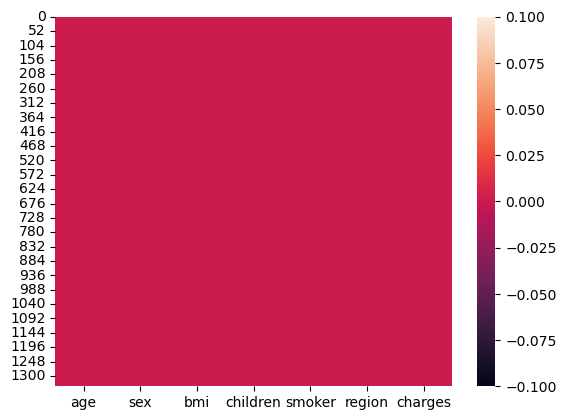

In [8]:
sns.heatmap(medical_df.isnull())


Here we can see that no null values are present in the dataset

# Checking for duplicate values in the dataset

In [9]:
medical_df.duplicated().value_counts()


False    1337
True        1
dtype: int64

In [10]:
medical_df.duplicated().sum()

1

Here,we see that 1 duplicate record is found

In [11]:
duplicates = medical_df.duplicated()
print(medical_df[duplicates])

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


Here we saw 1 duplicate records

In [12]:
medical_df = medical_df.drop_duplicates()

here we drop dulicate record

In [13]:
medical_df.duplicated().value_counts()

False    1337
dtype: int64

Now no dulicates in dataset

In [14]:
medical_df.nunique().to_frame('No of unique values')

,No of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [15]:
#Checking description of dataset
medical_df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010



   
-- The mean and median of age,bmi and Children columns are equal, and thus we can say they are normally distributed.
-- The max of all the columns is exceptionally high than median, and thus we can say outliers are present in all the columns


# Data Visualization

# Univariate Analysis

64    22
61    23
62    23
63    23
60    23
39    25
35    25
38    25
36    25
58    25
59    25
37    25
32    26
33    26
55    26
34    26
56    26
57    26
41    27
40    27
31    27
44    27
42    27
30    27
43    27
29    27
49    28
54    28
53    28
21    28
22    28
24    28
25    28
28    28
27    28
23    28
26    28
52    29
48    29
20    29
45    29
46    29
47    29
51    29
50    29
19    67
18    69
Name: age, dtype: int64

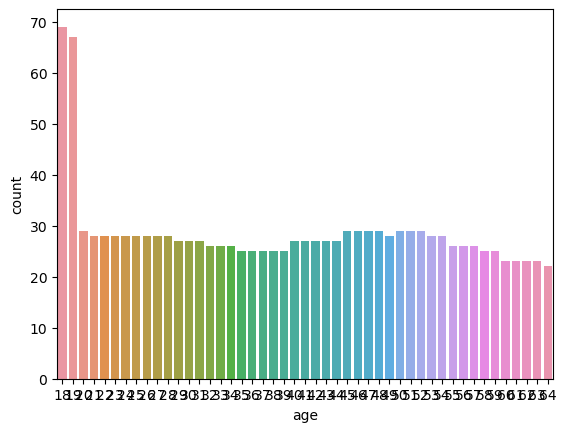

In [17]:
# Count plot to check individual value counts of age
sns.countplot(medical_df['age'])
medical_df['age'].value_counts().sort_values()

male      675
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

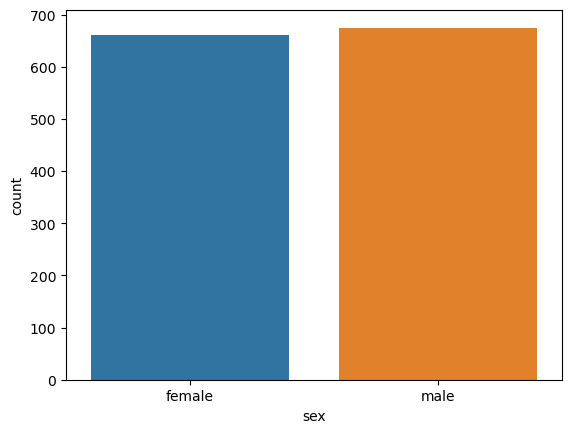

In [18]:
# Count plot to check individual value counts of Sex
print(medical_df['sex'].value_counts())

sns.countplot(medical_df['sex'])

We can see that here Male And Female counts having not much difference

yes     274
no     1063
Name: smoker, dtype: int64

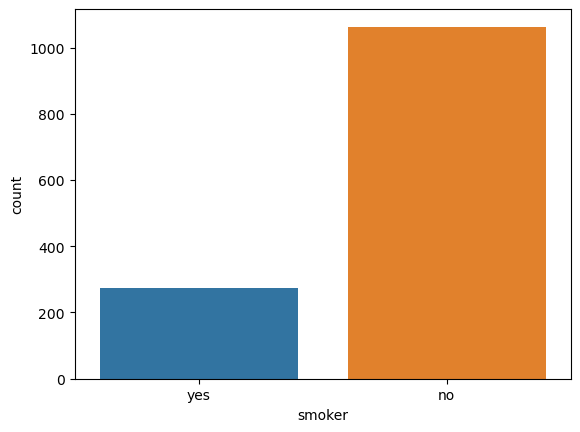

In [19]:
# Count plot to check individual value counts of smoker
sns.countplot(medical_df['smoker'])
medical_df['smoker'].value_counts().sort_values()

northwest    324
northeast    324
southwest    325
southeast    364
Name: region, dtype: int64

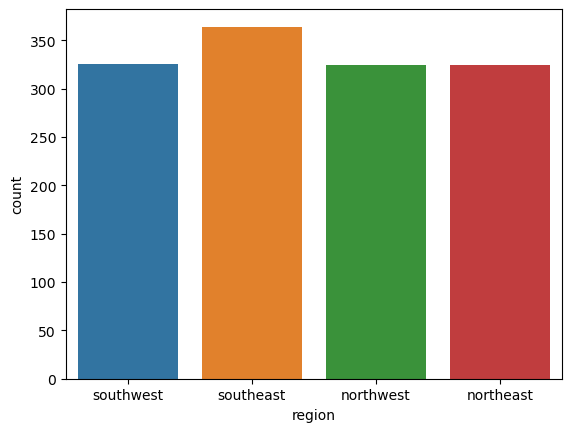

In [20]:
# Count plot to check individual value counts of region
sns.countplot(medical_df['region'])
medical_df['region'].value_counts().sort_values()

Here we can see mainly 4 regions are there

5     18
4     25
3    157
2    240
1    324
0    573
Name: children, dtype: int64

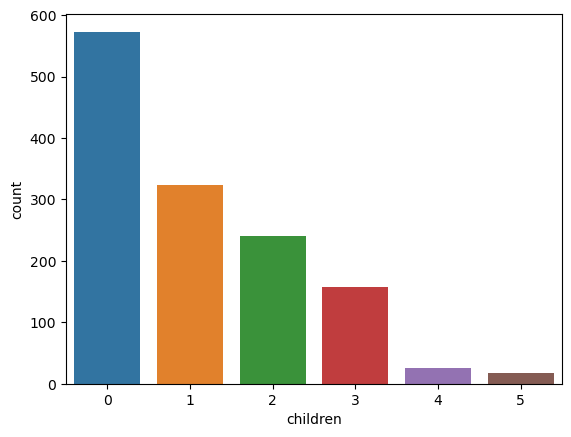

In [21]:
# Count plot to check individual value counts of children
sns.countplot(medical_df['children'])
medical_df['children'].value_counts().sort_values()

# Bivariate Analysis

<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

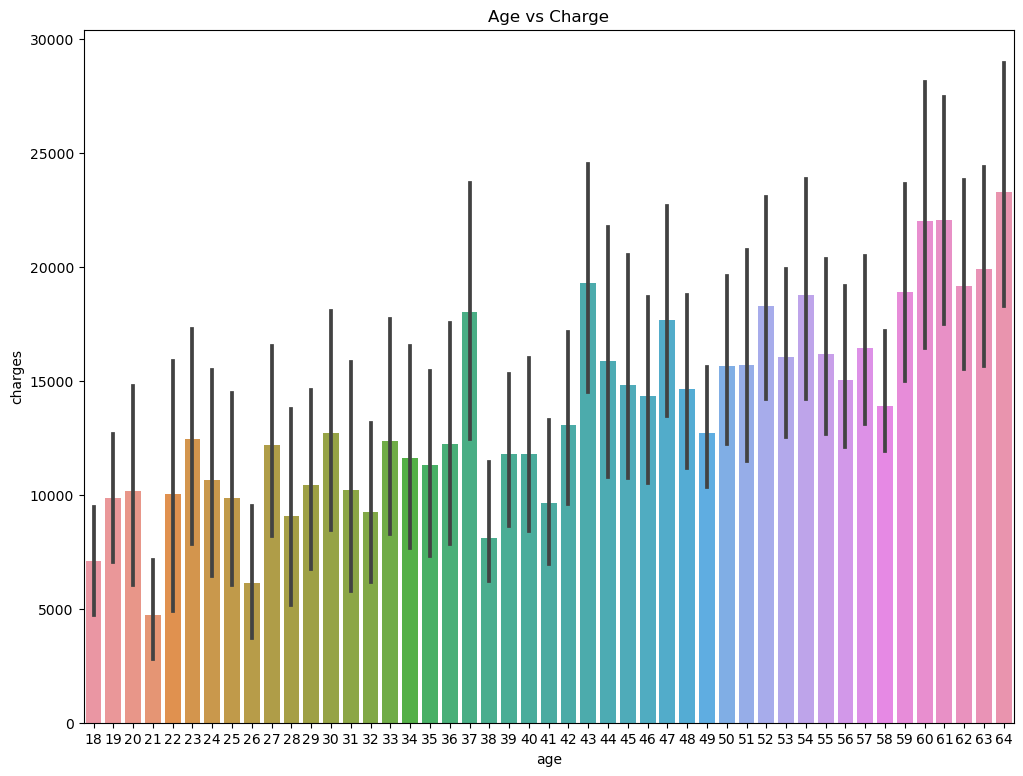

In [22]:
#Checking Age Vs Charge
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=medical_df)

From the above Plot,we can observe that as the age of a person increases premium prices goes up

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

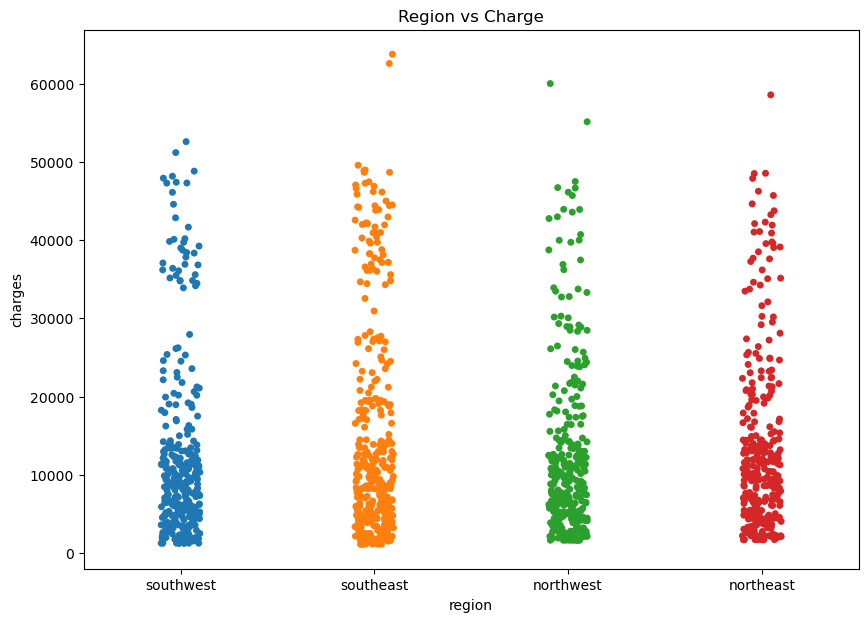

In [23]:
#Checking Region Vs Charge
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.stripplot(x='region',y='charges',data=medical_df)

We can see,Charges are approximately the same in the given four regions.

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

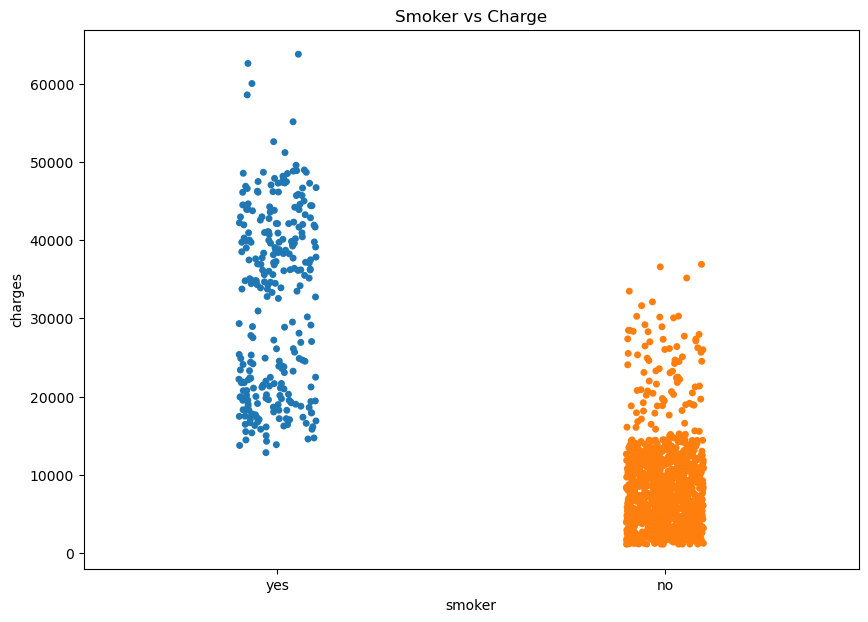

In [24]:
#Checking Smoker Vs Charge
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.stripplot(x='smoker',y='charges',data=medical_df)

Premium charged from the smoker is more than that which is charged from non-smokers.

Text(0.5, 1.0, 'Age VS Charge')

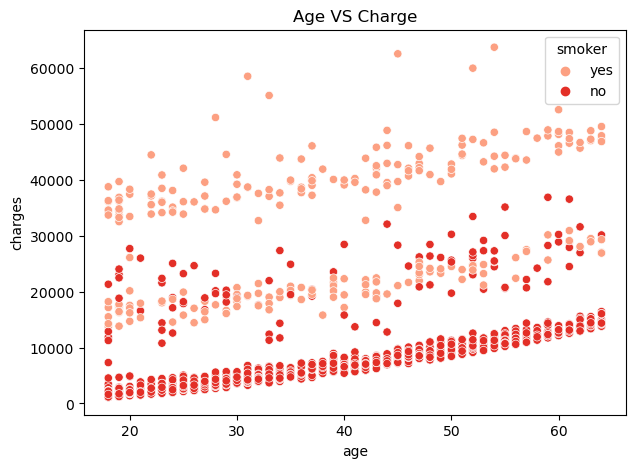

In [25]:
#checking Age Vs Charge for smoker
plt.figure(figsize=(7,5))
sns.scatterplot(x='age',y='charges',hue='smoker',data=medical_df,palette='Reds')
plt.title('Age VS Charge')


A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.

Text(0.5, 1.0, 'BMI VS Charge')

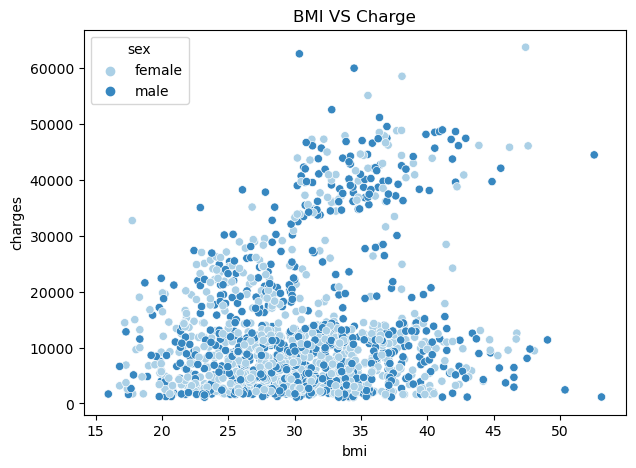

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=medical_df,palette='Blues')
plt.title('BMI VS Charge')

Charges are on the higher side for males as compared to females on BMI but the difference is not that much.

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

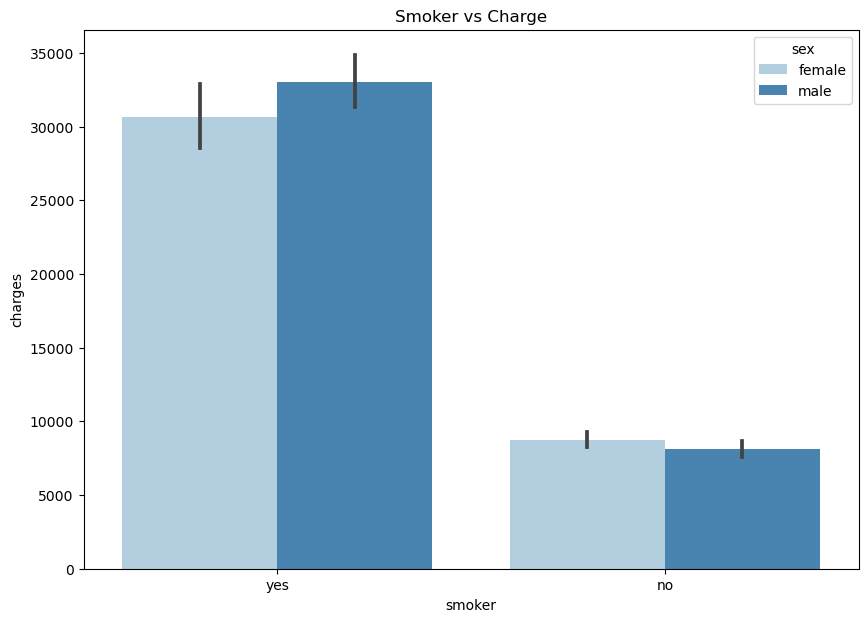

In [27]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=medical_df,palette='Blues',hue='sex')

# Converting Categorical Features to Numerical

In [28]:
#Converting sex,smoker,region into numeric data
medical_df['sex']=medical_df['sex'].map({'male':0,'female':1})
medical_df['smoker']=medical_df['smoker'].map({'yes':1,'no':0})
medical_df['region']=medical_df['region'].map({'northeast':0,'northwest':1 ,'southeast':2,'southwest':3})

In [29]:
medical_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,0,29.830,2,0,0,6406.41070
9,60,1,25.840,0,0,1,28923.13692


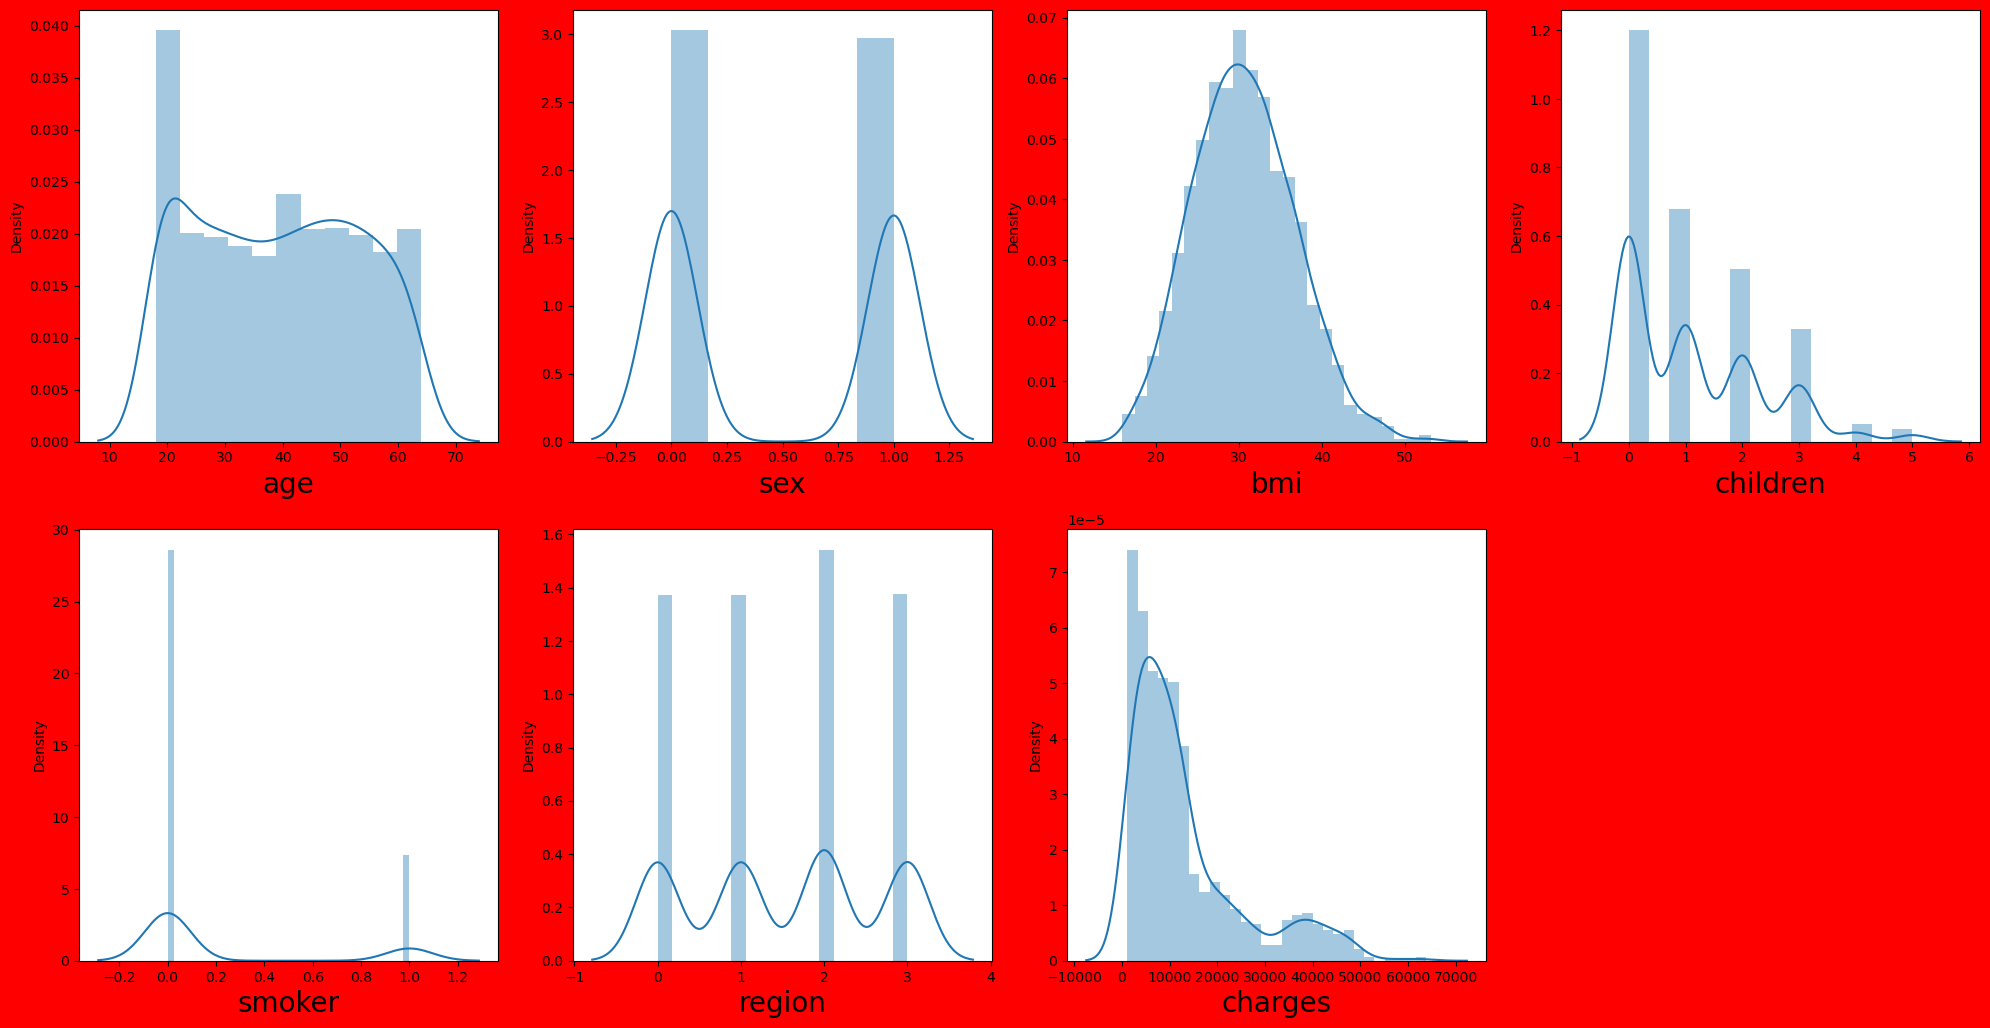

In [31]:
#Lets see how the data is distributed for every column

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize =(20,15), facecolor = 'red')
plotnumber = 1

for column in medical_df:
    if plotnumber <=7:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(medical_df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber +=1
plt.tight_layout()

From the above distribution plot, I noticed that the data almost looks mormaly distributed in Age and BMI.and othrs are categorical columns.

In [32]:
medical_df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.004936,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,-0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


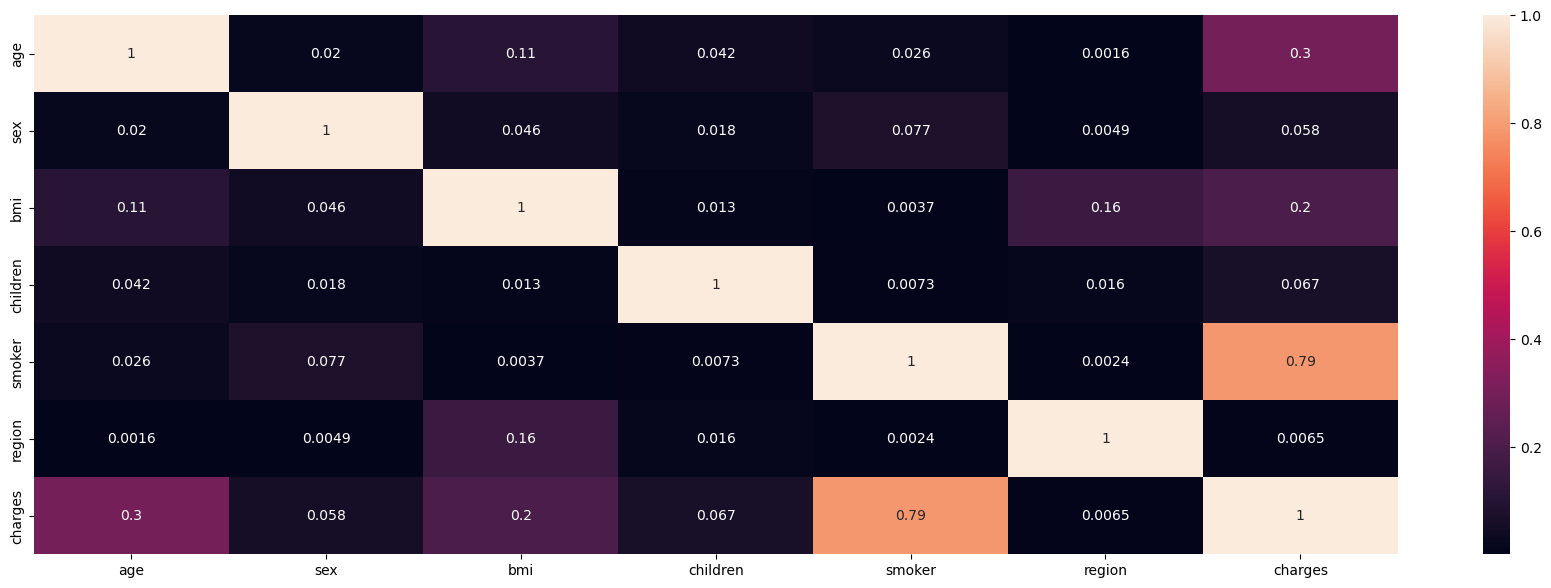

In [33]:
# Plot the heatmap
import matplotlib.pyplot as plt

df_corr=medical_df.corr().abs()
plt.figure(figsize=(22,7))
sns.heatmap(df_corr, annot=True)
plt.show()


Smoker, BMI and Age are most important factor that determnines - Charges

Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation but our data is small so will proceed with same data


In [34]:

df=medical_df
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


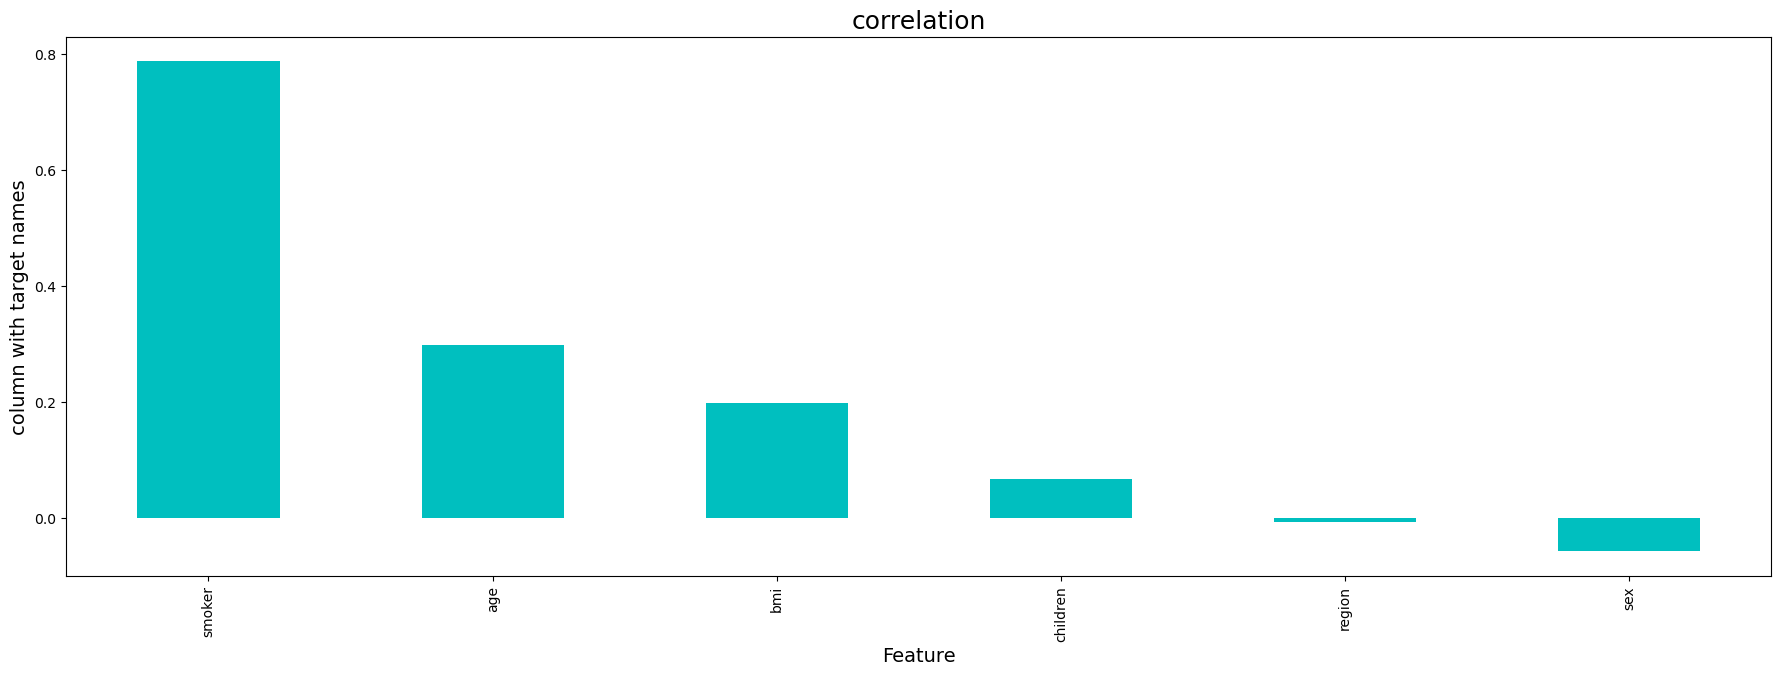

In [35]:
#Checking the columns which are positively and negatively correlated with the quality column

plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Smoker, BMI and Age are most important factor for defining charges

# Separate the data into Features and lable

In [36]:
x= medical_df.drop(['charges'],axis=1)
y=medical_df['charges']

In [37]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,0
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [38]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

# Standardization of data

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler=StandardScaler()
x_scaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [41]:
x_scaled

,age,sex,bmi,children,smoker,region
0,-1.440418,1.009771,-0.453160,-0.909234,1.969660,1.343163
1,-1.511647,-0.990324,0.509422,-0.079442,-0.507702,0.438017
2,-0.799350,-0.990324,0.383155,1.580143,-0.507702,0.438017
3,-0.443201,-0.990324,-1.305052,-0.909234,-0.507702,-0.467128
4,-0.514431,-0.990324,-0.292456,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...,...
1332,0.767704,-0.990324,0.050269,1.580143,-0.507702,-0.467128
1333,-1.511647,1.009771,0.206053,-0.909234,-0.507702,-1.372274
1334,-1.511647,1.009771,1.014490,-0.909234,-0.507702,0.438017
1335,-1.297958,1.009771,-0.797524,-0.909234,-0.507702,1.343163


In [42]:
#Checking multicollinearity among features with variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,Score,features
0,1.015323,age
1,1.008923,sex
2,1.040634,bmi
3,1.002412,children
4,1.006557,smoker
5,1.025976,region


Here we can see that there is no multicollinearity among features

# Model Building

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [47]:
#Splitting Dataset
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=45)

In [48]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (935, 6)
Size of y_train :  (935,)
Size of X_test :  (402, 6)
Size of Y_test :  (402,)


# LinearRegression

In [54]:
# importing the model
from sklearn.linear_model import LinearRegression
lrmodel = LinearRegression()
# Fit linear model by passing training dataset
lrmodel.fit(x_train,y_train)

LinearRegression()

In [55]:
lrmodel.score(x_train,y_train)

0.7544829402568807

In [78]:
train_score =lrmodel.score(x_train,y_train)
test_score=lrmodel.score(x_test,y_test)
cv=cross_val_score(lrmodel,x,y,cv=5,).mean()



print('Train Score --',train_score)
print('Test Score --',test_score)
print('CV Score --',cv)

Train Score -- 0.7544829402568807
Test Score -- 0.7336973534291839
CV Score -- 0.7471285330088384


# SVR

In [76]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(x_train,y_train)
y_predtrain1=svrmodel.predict(x_train)
y_predtest1=svrmodel.predict(x_test)

r2_train1 =r2_score(y_train,ypredtrain1)
r2_test1=r2_score(y_test,ypredtest1)
cv1=cross_val_score(svrmodel,x,y,cv=5,).mean()
print('Train R2 score :',r2_train1)
print('Test R2 Score :',r2_test1)
print('CV Score :',cv1)



Train R2 score : -0.1047961288763628
Test R2 Score : -0.06118831268567182
CV Score : -0.10374308479997944
Train R2 score : -0.1047961288763628
Test R2 Score : -0.06118831268567182
CV Score : -0.10374308479997944


# RandomForestRegression

In [75]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(x_train,y_train)
ypredtrain2=rfmodel.predict(x_train)
ypredtest2=rfmodel.predict(x_test)

r2_train2 =r2_score(y_train,ypredtrain2)
r2_test2=r2_score(y_test,ypredtest2)
cv2=cross_val_score(rfmodel,x,y,cv=5,).mean()
print('Train R2 score :',r2_train2)
print('Test R2 Score :',r2_test2)
print('CV Score :',cv2)




Train R2 score : 0.9751904582978596
Test R2 Score : 0.8467305341741477
CV Score : 0.8351895705236533


# GradientBoostingRegression

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbmodel=GradientBoostingRegressor()
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)
r2_train3 =r2_score(y_train,ypredtrain3)
r2_test3=r2_score(y_test,ypredtest3)
cv3=cross_val_score(gbmodel,x,y,cv=5,).mean()
print('Train R2 score :',r2_train3)
print('Test R2 Score :',r2_test3)
print('CV Score :',cv3)

Train R2 score : 0.9053271228105951
Test R2 Score : 0.8647194634326565
CV Score : 0.8556840835348052


In [80]:
#compairing Model
models = [('Linear Regression', train_score,test_score,cv),
          ('Support Vector Regression', r2_train1, r2_test1, cv1),
          ('Random Forest Regression', r2_train2, r2_test2, cv2),
          ('Gradient Boosting Regression', r2_train3, r2_test3, cv3)   
         ]

In [82]:
predict = pd.DataFrame(data = models, columns=[ 'Model','R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,0.754483,0.733697,0.747129
1,Support Vector Regression,-0.104796,-0.061188,-0.103743
2,Random Forest Regression,0.975190,0.846731,0.835190
3,Gradient Boosting Regression,0.905327,0.864719,0.855684


From the above table we can observe thatGradient Boosting Regression having test score is good so this is the best model.

# Hyper parameter Tuning

In [84]:
#tune the parameters
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(x_train,y_train)
ypredtrain3=gbmodel.predict(x_train)
ypredtest3=gbmodel.predict(x_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,x,y,cv=5,).mean())

{'learning_rate': 0.2, 'n_estimators': 21}
0.87848949709112
0.8735061823588223
0.8604482012425521


# Saving the best Model

In [85]:
import pickle
filename = 'Medical_cost_prediction.pkl'
pickle.dump(gbmodel,open(filename,'wb'))

In [86]:
loaded_model = pickle.load(open('Medical_cost_prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

87.35061823588222


In [87]:
### Predicting the Output
original = np.array(y_test)
predicted = np.array(loaded_model.predict(x_test))
df_new = pd.DataFrame({"Original":original,"Predicted":predicted},index= range(len(original)))
df_new.sample(20)

,Original,Predicted
398,20167.33603,17012.210447
27,23807.24060,23995.911227
193,6933.24225,7298.943156
228,11848.14100,12619.493394
87,19673.33573,4572.740471
285,1906.35825,3729.811316
274,5910.94400,6572.623712
204,12244.53100,14610.576339
129,11365.95200,12705.160121
254,7077.18940,8000.437015


# Conclusion

# The dataset we have used here was small still the conclusion we drew from them were quite similar to what is observed in the dataset.

# The prediction results indicated that Gradient Boosting Regression model achieved excellent prediction accuracy.